<a href="https://colab.research.google.com/github/TheRealM1M1/final_project/blob/main/Brown_PreCollege_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1957912104, 1957912109, 1781195425, 9881779378, 5966527883, 8817553328, 8817553327, 5740413752, 11240075386, 6185891346, 1875433545, 1875433356, 4249422127, 4249421836, 4249422097]
Number of nodes: 15


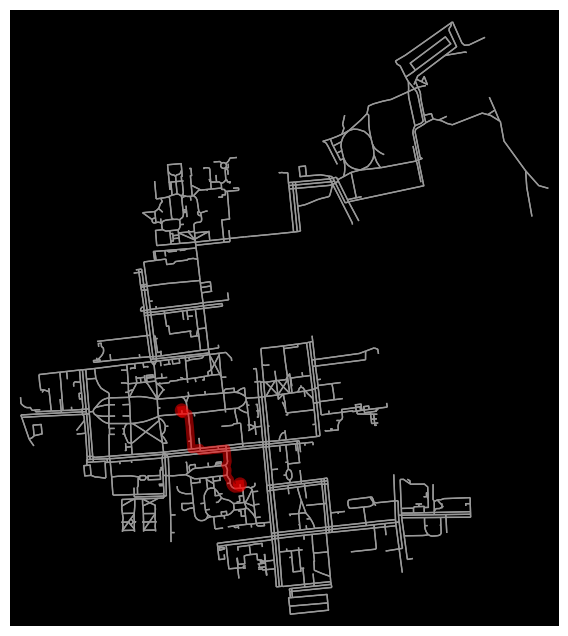

In [ ]:
import networkx as nx
import osmnx as ox

ox.__version__
"""This cell imports the graph and outputs the list of the best route (according to OSMnx) for the test
This test from OSMnx acts as a basis and an example for the two algorithms implemented"""

def built_in_search():
  # Import then print the map
  G = ox.graph_from_place("Brown University, Providence, Rhode Island, USA", network_type="walk")


  G_proj = ox.project_graph(G)
  nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
  graph_area_m = nodes_proj.unary_union.convex_hull.area
  graph_area_m

  # Get stats about every node


  start_latlng = (41.82616, -71.40259)
  end_latlng = (41.82507, -71.40090)

  # Find the nearest nodes to the start and end locations
  orig_node = ox.distance.nearest_nodes(G, X=start_latlng[1], Y=start_latlng[0])
  dest_node = ox.distance.nearest_nodes(G, X=end_latlng[1], Y=end_latlng[0])

  # Assign custom names to specific nodes
  G.nodes[orig_node]['name'] = "Start Point"
  G.nodes[dest_node]['name'] = "End Point"

  # Calculate the shortest path
  route = nx.shortest_path(G, orig_node, dest_node, weight='length')

  correct_route = []
  i = 1

  # Print the names of nodes along the route
  for node in route:

        node_data = G.nodes[node]
        i = i + 1
        correct_route.append(node)
  print(correct_route)
  print("Number of nodes:", len(correct_route))

  # plot the route
  fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')


built_in_search()

Test: Using two different search algorithms, compare their outputs (finding a route from Sayles Hall to the Ratty) based on efficiency and correctness.
Route planned by iterative deepening: [1957912104, 1957912109, 1781195425, 9881779378, 5966527883, 1875433386, 5966528685, 5966528687, 6185891346, 1875433545, 1875433356, 4249422127, 4249421836, 4249422097]
Number of nodes: 14


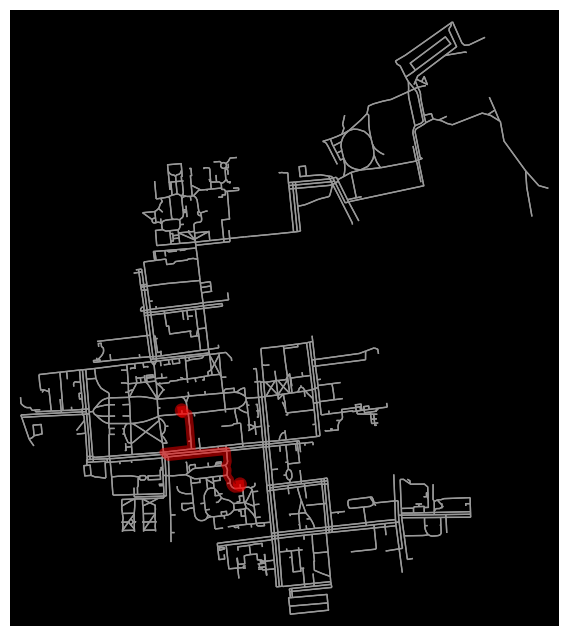

In [ ]:
import networkx as nx
import osmnx as ox

ox.__version__

"""This cell includes the implementation of the Iterative Deepening algorithm as well as a test for it"""

print("Test: Using two different search algorithms, compare their outputs (finding a route from Sayles Hall to the Ratty) based on efficiency and correctness.")

# Import the map
G = ox.graph_from_place("Brown University, Providence, Rhode Island, USA", network_type="walk")


class Node():
  def __init__(self, state, parent=None, action=None, path_cost=0):
    self.state = state
    self.parent = parent
    self.action = action
    if self.parent == None:
      self.depth = 0
    else:
      self.depth = self.parent.depth + 1

  @staticmethod
  def starting_node(location, G):
    start_latlng = (location)
    orig_node = ox.distance.nearest_nodes(G, X=start_latlng[1], Y=start_latlng[0])
    G.nodes[orig_node]['name'] = "Starting Node"
    return orig_node

  @staticmethod
  def goal_node(location, G):
    end_latlng = (location)
    dest_node = ox.distance.nearest_nodes(G, X=end_latlng[1], Y=end_latlng[0])
    G.nodes[dest_node]['name'] = "Goal Node"
    return dest_node


  @staticmethod
  def is_goal(node, goal):
    if node.state == goal:
      return True
    else:
      return False

class SearchProblem():

  def __init__(self, G):
    self.G = G

  def step_cost(self, state1, action, state2):
    return self.G[state1][state2][0].get('length', 1)

  def successors(self, state):
    return [(neighbor, neighbor) for neighbor in self.G.neighbors(state)]

class IterativeDeepening():

    def __init__(self, G): # Initialize with the graph
        self.G = G
        self.problem = SearchProblem(G)


    def extract_path(self, node):
      path = []
      while node:
        path.append(node.state)
        node = node.parent
      return path[::-1] # Reverse the path

    def IDsearch(self, start, goal):
      starting_node = Node.starting_node(start, self.G)
      goal_node = Node.goal_node(goal, self.G)
      return self.iterative_deepening_search(starting_node, goal_node)


    def iterative_deepening_search(self, start, goal):
      for depth in range(0, 100):
        result = self.depth_limited_search(start, goal, depth)
        if result != 'cutoff':
          return self.extract_path(result)




    def depth_limited_search(self, start, goal, limit):
      frontier = [Node(start)]
      result = 'failure'
      while frontier:
          node = frontier.pop()

          if Node.is_goal(node, goal):
              return node
          if node.depth > limit:
              result = 'cutoff'
          else:
              if not self.is_cycle(node):
                  for child in self.expand(node):
                      frontier.append(child)

      return result

    def is_cycle(self, node):
      current = node
      while current.parent:
        if current.state == current.parent.state:
          return True
        current = current.parent
      return False

    def expand(self, node):
      return [Node(next_state, node, action, self.problem.step_cost(node.state, action, next_state))
          for (action, next_state) in self.problem.successors(node.state)]




my_instance = IterativeDeepening(G)



def test_iterative_deepening():

  # arrange
  start_location = (41.82616, -71.40259) # Sayles Hall
  goal_location = (41.82507, -71.40090) # The Ratty



  #action
  route = my_instance.IDsearch(start_location, goal_location)
  print("Route planned by iterative deepening:", route)
  print("Number of nodes:", len(route))
  fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')



test_iterative_deepening()






Test: Using two different search algorithms, compare their outputs (finding a route from Sayles Hall to the Ratty) based on efficiency and correctness.
Route planned by bidirectional search: [1957912104, 1957912109, 1781195425, 9881779378, 5966527883, 8817553328, 8817553327, 5740413752, 11240075386, 6185891346, 1875433545, 1875433356, 4249422127, 4249421836, 4249422097]
Number of nodes: 15


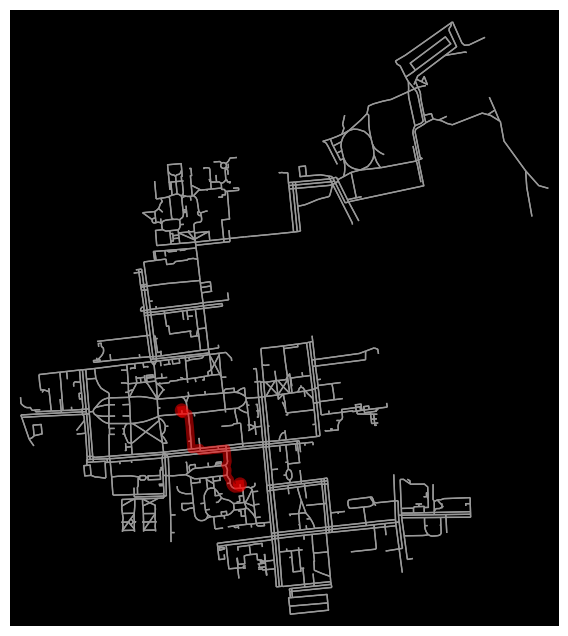

In [ ]:
import networkx as nx
import osmnx as ox
from queue import PriorityQueue
from queue import Queue
from collections import deque
import heapq
#!pip install PriorityQueue


ox.__version__

"""This cell includes the implementation of the Bidirectional Search algorithm as well as a test for it"""

print("Test: Using two different search algorithms, compare their outputs (finding a route from Sayles Hall to the Ratty) based on efficiency and correctness.")


# Import the map
G = ox.graph_from_place("Brown University, Providence, Rhode Island, USA", network_type="walk")

class PriorityQueue():
    def __init__(self):
        self.elements = []

    def empty(self):
        return len(self.elements) == 0

    def put(self, item):
        heapq.heappush(self.elements, item)

    def get(self):
        return heapq.heappop(self.elements)

    def top(self):
        return self.elements[0]

class Node():
  def __init__(self, state, parent=None, action=None, cost=0):
    self.state = state
    self.parent = parent
    self.action = action
    self.cost = cost

  def __lt__(self, other):
    return self.cost < other.cost

  @staticmethod
  def starting_node(location, G):
    start_latlng = (location)
    orig_node = ox.distance.nearest_nodes(G, X=start_latlng[1], Y=start_latlng[0])
    G.nodes[orig_node]['name'] = "Starting Node"
    return Node(orig_node)

  @staticmethod
  def goal_node(location, G):
    end_latlng = (location)
    dest_node = ox.distance.nearest_nodes(G, X=end_latlng[1], Y=end_latlng[0])
    G.nodes[dest_node]['name'] = "Goal Node"
    return Node(dest_node)


  @staticmethod
  def is_goal(node, goal):
    if node.state == goal:
      return True
    else:
      return False

class SearchProblem():
  def step_cost(self, state1, action, state2):
      return self.G[state1][state2][0].get('length', 1)

  def path_cost(self, node):
    return node.cost

  def successors(self, state):
    return [(neighbor, neighbor) for neighbor in self.G.neighbors(state)]

  def __init__(self, G):
    self.G = G

class Problem():
    def __init__(self, initial, goal):
        self.initial = initial
        self.goal = goal

    def step_cost(self, state1, action, state2):
      return self.G[state1][state2][0].get('length', 1)

    def path_cost(self, node):
      return node.cost

    def successors(self, state):
      return [(neighbor, neighbor) for neighbor in self.G.neighbors(state)]

class BidirectionalSearch():

  def __init__(self, G): # Initialize with the graph
        self.G = G
        self.problem = SearchProblem(G)


  def terminated(self, solution, forward_frontier, backward_frontier):
    if solution != None:
        return True

    if not forward_frontier or not backward_frontier:
        return True

    return False


  def bidirectional_search(self, problemF, problemB):
    nodeF = (problemF.initial)
    nodeB = (problemB.initial)

    forward_frontier = PriorityQueue()
    forward_frontier.put(nodeF)
    backward_frontier = PriorityQueue()
    backward_frontier.put(nodeB)

    reachedF = {nodeF.state: nodeF}
    reachedB = {nodeB.state: nodeB}

    solution = None

    while not self.terminated(solution, forward_frontier, backward_frontier):
      if self.problem.path_cost(forward_frontier.top()) < self.problem.path_cost(backward_frontier.top()):
        solution = self.proceed('F', problemF, forward_frontier, reachedF, reachedB, solution)
      else:
        solution = self.proceed('B', problemB, backward_frontier, reachedB, reachedF, solution)

    return solution


  def proceed(self, dir, problem, frontier, reached, reached2, solution):
    node = frontier.get()

    for child in self.expand(node):
      s = child.state
      if s not in reached or self.problem.path_cost(child) < self.problem.path_cost(reached[s]):
        reached[s] = child
        frontier.put(child)

      if s in reached2:
        solution2 = self.join_nodes(dir, child, reached2[s])
        if solution == None or self.problem.path_cost(solution2) < self.problem.path_cost(solution):
          solution = solution2
    return solution


  def expand(self, node):
      return [Node(next_state, node, action, node.cost + self.problem.step_cost(node.state, action, next_state))
          for (action, next_state) in self.problem.successors(node.state)]


  def join_nodes(self, direction, node1, node2):
    if direction == "F":
      path_forward = self.reconstruct_path(node1)
      path_backward = self.reconstruct_path(node2)[::-1] # give the reverse of the path (since it's backwards)
    else: #if the direction is backward
      path_forward = self.reconstruct_path(node2)
      path_backward = self.reconstruct_path(node1)[::-1]

    path_backward.pop(0)

    solution_path = path_forward + path_backward
    return solution_path


  def reconstruct_path(self, node):
    path = []
    while node:
      path.append(node.state)
      node = node.parent
    return path[::-1]




my_instance = BidirectionalSearch(G)



def test_bidirectional_search():

  # arrange
  start_location = (41.82616, -71.40259) # Sayles Hall
  goal_location = (41.82507, -71.40090) # The Ratty



  #action
  initial_state = Node.starting_node(start_location, G)
  goal_state = Node.goal_node(goal_location, G)
  problemF = Problem(initial_state, goal_state)
  problemB = Problem(goal_state, initial_state)
  route = my_instance.bidirectional_search(problemF, problemB)
  print("Route planned by bidirectional search:", route)
  print("Number of nodes:", len(route))
  fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

test_bidirectional_search()
%timeit

